# SI 618 Day 9: Dimension Reduction

Version 2023.03.07.3.CT

## Task (to generate data for use later in today's class):
Fill in the [spreadsheet](https://docs.google.com/spreadsheets/d/178npckIJAcp0vY2TEmg9Sn3sJYUYYDSAmw8_ouxZR7A/edit?usp=sharing) with your music preferences.  Rate each genre on a scale of 1 to 10, with 1 being "no way" and 10 being "the best".  Note that you are indicating your preference for each genre on a scale of 1-10; 
you are not ranking the genres from 1-10.  Thus, you can have all 10s if you love all genres of music, or all 1s if you hate music in general.

Install Open CV package: pip install opencv-python, 
Install plotly : pip install plotly

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import manifold

## Demo

Let's set up a really simple dataframe to play with:

In [12]:
demo = pd.DataFrame(
    {"a": [1, 2, 3, 1], "b": [1, 4, 6, 1], "c": [2, 4, 6, 3]},
    index=["Chris", "Xin", "Arjun", "Buko"],
)

In [13]:
demo

,a,b,c
Chris,1,1,2
Xin,2,4,4
Arjun,3,6,6
Buko,1,1,3


And then let's split the dataframe into X and y matrices:

In [14]:
demo_X = demo.values

In [15]:
demo_X

array([[1, 1, 2],
       [2, 4, 4],
       [3, 6, 6],
       [1, 1, 3]], dtype=int64)

In [16]:
demo_y = demo.index

In [17]:
demo_y

Index(['Chris', 'Xin', 'Arjun', 'Buko'], dtype='object')

## Multi-dimensional scaling (MDS)

In [18]:
nmds = manifold.MDS(
    n_components=2,
    metric=False,
    max_iter=3000,
    eps=1e-9,
    random_state=42,
    dissimilarity="euclidean",
    normalized_stress="auto",
    n_jobs=1,
)

In [19]:
npos = nmds.fit_transform(demo_X)

In [20]:
npos

array([[-0.25640198,  0.45035412],
       [ 0.10299116, -0.125423  ],
       [ 0.43708603, -0.41819504],
       [-0.28367521,  0.09326392]])

In [21]:
npos_labelled = pd.concat(
    [pd.DataFrame({"who": demo_y}), pd.DataFrame(npos)], axis=1
)

In [22]:
npos_labelled.columns = ["who", "mds1", "mds2"]

In [23]:
npos_labelled

,who,mds1,mds2
0,Chris,-0.256402,0.450354
1,Xin,0.102991,-0.125423
2,Arjun,0.437086,-0.418195
3,Buko,-0.283675,0.093264


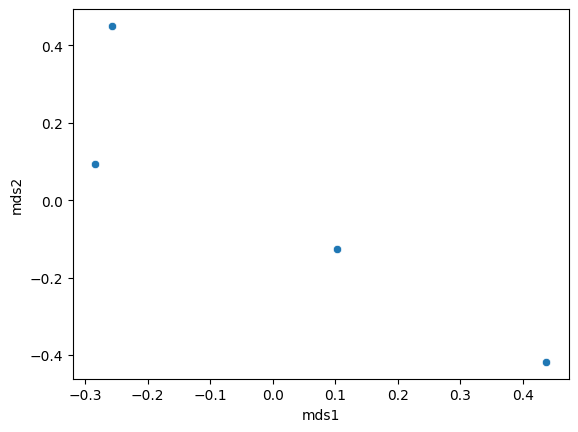

In [24]:
p1 = sns.scatterplot(data=npos_labelled, x="mds1", y="mds2")

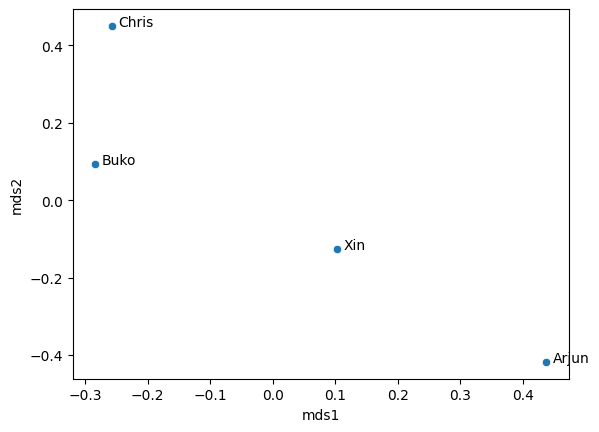

In [25]:
# Based on https://stackoverflow.com/questions/46027653/adding-labels-in-x-y-scatter-plot-with-seaborn
p1 = sns.scatterplot(data=npos_labelled, x="mds1", y="mds2")
for line in range(0, npos_labelled.shape[0]):
    p1.text(
        npos_labelled["mds1"][line] + 0.01,
        npos_labelled["mds2"][line],
        npos_labelled["who"][line],
        horizontalalignment="left",
        size="medium",
        color="black",
    )

In [26]:
def labelled_scatterplot(data=None, x=None, y=None, labs=None):
    p1 = sns.scatterplot(data=data, x=x, y=y)
    for line in range(0, data.shape[0]):
        if data[labs][line] == "Chris T":
            c = "red"
        else:
            c = "black"
        p1.text(
            data[x][line] + 0.01,
            data[y][line],
            data[labs][line],
            horizontalalignment="left",
            size="medium",
            color=c,
        )

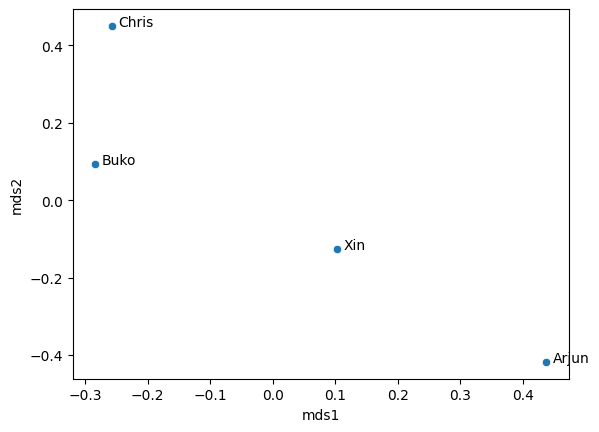

In [27]:
labelled_scatterplot(npos_labelled, "mds1", "mds2", "who")

EXAMPLE 2

In [28]:
df = pd.DataFrame(
    {
        "player": ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K"],
        "points": [4, 4, 6, 7, 8, 14, 16, 19, 25, 25, 28],
        "assists": [3, 2, 2, 5, 4, 8, 7, 6, 8, 10, 11],
        "blocks": [7, 3, 6, 7, 5, 8, 8, 4, 2, 2, 1],
        "rebounds": [4, 5, 5, 6, 5, 8, 10, 4, 3, 2, 2],
    }
)

In [29]:
df = df.set_index("player")

In [30]:
X = df.values

In [31]:
y = df.index

In [32]:
npos = nmds.fit_transform(X)

In [33]:
npos

array([[-0.19175961,  0.11334459],
       [-0.20035458,  0.30754401],
       [ 0.22301044, -0.06627027],
       [-0.37198597,  0.27169808],
       [-0.10256325,  0.39072683],
       [ 0.44084649, -0.56102777],
       [ 0.15362031, -0.46778332],
       [ 0.54838192,  0.04812215],
       [-0.27120714, -0.42027557],
       [-0.36834069, -0.10463543],
       [ 0.2884843 ,  0.38548271]])

In [34]:
npos_labelled = pd.concat(
    [pd.DataFrame({"who": y}), pd.DataFrame(npos)], axis=1
)

In [35]:
npos_labelled.columns = ["who", "mds1", "mds2"]

In [36]:
npos_labelled

,who,mds1,mds2
0,A,-0.191760,0.113345
1,B,-0.200355,0.307544
2,C,0.223010,-0.066270
3,D,-0.371986,0.271698
4,E,-0.102563,0.390727
5,F,0.440846,-0.561028
6,G,0.153620,-0.467783
7,H,0.548382,0.048122
8,I,-0.271207,-0.420276
9,J,-0.368341,-0.104635


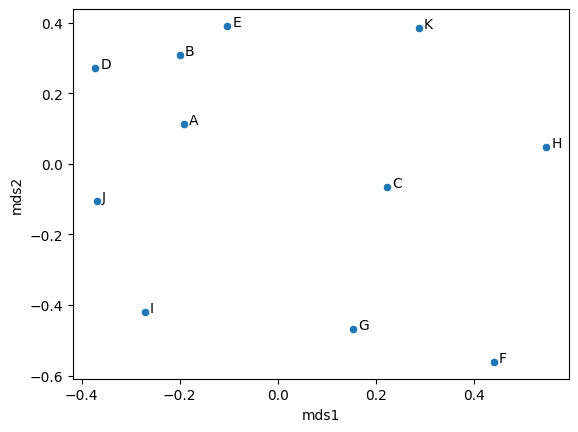

In [37]:
labelled_scatterplot(npos_labelled, "mds1", "mds2", "who")

In [38]:
df.head()

,points,assists,blocks,rebounds
player,,,,
A,4,3,7,4
B,4,2,3,5
C,6,2,6,5
D,7,5,7,6
E,8,4,5,5


## Principal Components Analysis (PCA)

In [39]:
demo

,a,b,c
Chris,1,1,2
Xin,2,4,4
Arjun,3,6,6
Buko,1,1,3


In [40]:
from sklearn.preprocessing import scale

scale(demo_X)

array([[-0.90453403, -0.94280904, -1.18321596],
       [ 0.30151134,  0.47140452,  0.16903085],
       [ 1.50755672,  1.41421356,  1.52127766],
       [-0.90453403, -0.94280904, -0.50709255]])

In [41]:
np.var([-1.29777, 0.016222, 1.135549])

0.9889454738615555

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scale(demo_X))

In [43]:
X_pca

array([[-1.74849588, -0.21383124],
       [ 0.54456683, -0.1913689 ],
       [ 2.56500363,  0.07178607],
       [-1.36107457,  0.33341407]])

In [44]:
X_pca_labelled = pd.concat(
    [
        pd.DataFrame({"who": demo_y}),
        pd.DataFrame(X_pca, columns=["pca1", "pca2"]),
    ],
    axis=1,
)

In [45]:
X_pca_labelled

,who,pca1,pca2
0,Chris,-1.748496,-0.213831
1,Xin,0.544567,-0.191369
2,Arjun,2.565004,0.071786
3,Buko,-1.361075,0.333414


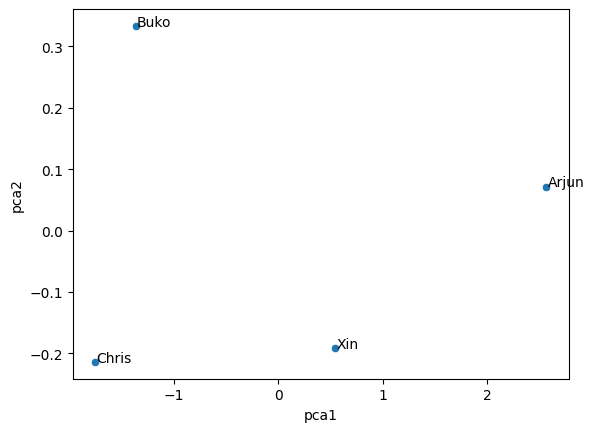

In [46]:
labelled_scatterplot(data=X_pca_labelled, x="pca1", y="pca2", labs="who")

In [47]:
pca.explained_variance_

array([3.9285195 , 0.06622135])

In [48]:
np.cov(X_pca)

array([[ 1.17759778, -0.56470727, -1.91312642,  1.3002359 ],
       [-0.56470727,  0.2708007 ,  0.91742394, -0.62351737],
       [-1.91312642,  0.91742394,  3.10806691, -2.11236443],
       [ 1.3002359 , -0.62351737, -2.11236443,  1.43564589]])

In [49]:
pca.explained_variance_ratio_

array([0.98212987, 0.01655534])

### Question: 
What's the expected explained variance ratio for each variable?

IMAGE Compression with PCA

In [50]:
import cv2

ModuleNotFoundError: No module named 'cv2'

In [ ]:
mg = cv2.cvtColor(cv2.imread("your image file path"), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [ ]:
img.shape

In [ ]:
# Splitting into channels
blue, green, red = cv2.split(img)
# Plotting the images
fig = plt.figure(figsize=(15, 7.2))
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

In [ ]:
blue_temp_df = pd.DataFrame(data=blue)
blue_temp_df

In [ ]:
# initialize PCA with first 20 principal components
pca = PCA(20)

# Applying to red channel and then applying inverse transform to transformed array.
red_transformed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transformed)

# Applying to Green channel and then applying inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)

# Applying to Blue channel and then applying inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transformed)

In [ ]:
img_compressed = (
    np.dstack((blue_inverted, red_inverted, green_inverted))
).astype(np.uint8)

In [ ]:
plt.imshow(img_compressed)

**Answer:** for n variables, the expected explained variance for each variable is 1/n.

## t-SNE

In [ ]:
# import t-SNE package from sklearn
from sklearn.manifold import TSNE

In [ ]:
demo_X

array([[1, 1, 2],
       [2, 4, 4],
       [3, 6, 6],
       [1, 1, 3]], dtype=int64)

In [ ]:
tsne = TSNE(n_components=2, perplexity=2, random_state=0)
X = demo_X.copy()
X_2d = tsne.fit_transform(X)

In [ ]:
X_2d

array([[ 480.45862, -111.71963],
       [-348.12817,  -88.04702],
       [-684.47345, -200.03996],
       [ 219.88858,  141.66884]], dtype=float32)

In [ ]:
tsne_labelled = pd.concat(
    [pd.DataFrame({"who": demo_y}), pd.DataFrame(X_2d, columns=["d1", "d2"])],
    axis=1,
)

In [ ]:
tsne_labelled

,who,d1,d2
0,Chris,480.458618,-111.719627
1,Xin,-348.128174,-88.047020
2,Arjun,-684.473450,-200.039963
3,Buko,219.888580,141.668839


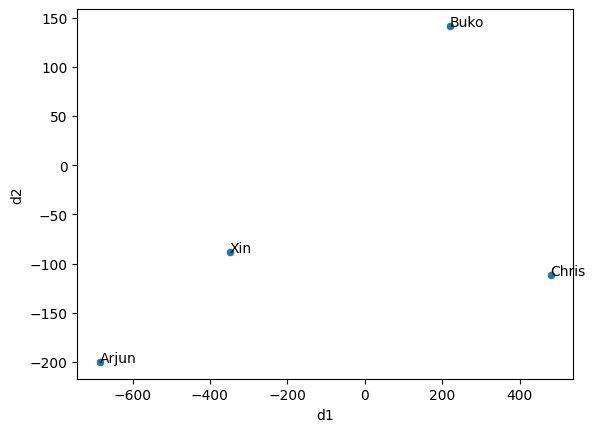

In [ ]:
labelled_scatterplot(data=tsne_labelled, x="d1", y="d2", labs="who")

Difference between t-SNEA and PCA

In [ ]:
churn_data = pd.read_csv("..\data\customer_churn.csv")
churn_data.head(3)

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0


In [ ]:
from sklearn.preprocessing import StandardScaler

X = churn_data.drop("Churn", axis=1)
y = churn_data["Churn"]

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

NameError: name 'churn_data' is not defined

In [ ]:
import plotly.express as px

fig = px.scatter(x=X_pca[:, 0], y=X_pca[:, 1], color=y)
fig.update_layout(
    title="PCA visualization of Customer Churn dataset",
    xaxis_title="First Principal Component",
    yaxis_title="Second Principal Component",
)
fig.show()

NameError: name 'X_pca' is not defined

In [ ]:
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
X_tsne = tsne.fit_transform(X_norm)

In [ ]:
fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=y)
fig.update_layout(
    title="t-SNE visualization of Customer Churn dataset",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

### t-SNE demo
https://cs.stanford.edu/people/karpathy/tsnejs/csvdemo.html

# In your groups

Let's read the CSV file of the music data we generated at the start of today's class:

In [67]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTRe8guKi6zKf4_rQr8BiNmb2-V1Qq72vV7ZqSQ9Upeo6TsBtgFyZ4kk_IJgGdXx6kPdJP6NC_s_HOO/pub?gid=0&single=true&output=csv"
music = pd.read_csv(url)

In [68]:
music

,Name,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Rock
0,Alex T,8.0,6.0,9.0,9.0,9.0,10.0,8.0,8.0,9.0,10.0
1,Anne Chang,8.0,10.0,3.0,8.0,8.0,5.0,8.0,7.0,5.0,5.0
2,Arthur C.,5.0,9.0,4.0,8.0,8.0,5.0,5.0,5.0,5.0,5.0
3,Athena Fan,5.0,3.0,5.0,8.0,8.0,7.0,5.0,4.0,9.0,9.0
4,Bella,5.0,5.0,4.0,7.0,5.0,8.0,3.0,8.0,10.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...
125,Ruofei Li,9.0,8.0,5.0,1.0,5.0,8.0,6.0,7.0,9.0,5.0
126,Trace Grain,6.0,4.0,1.0,8.0,1.0,10.0,10.0,8.0,6.0,8.0
127,Namratha B,6.0,7.0,5.0,4.0,6.0,9.0,7.0,7.0,10.0,6.0
128,Erika A.,1.0,6.0,1.0,10.0,2.0,6.0,4.0,3.0,4.0,4.0


In [ ]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        129 non-null    object 
 1   Blues       128 non-null    float64
 2   Classical   128 non-null    float64
 3   Country     128 non-null    float64
 4   Electronic  128 non-null    float64
 5   Folk        128 non-null    float64
 6   Hip Hop     128 non-null    float64
 7   Jazz        128 non-null    float64
 8   Latin       128 non-null    float64
 9   Pop         128 non-null    float64
 10  Rock        127 non-null    float64
dtypes: float64(10), object(1)
memory usage: 11.2+ KB


In [ ]:
music.describe()

,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Rock
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,123.000000,122.000000
mean,5.548387,6.588710,5.838710,5.435484,5.201613,14.072581,6.266129,4.951613,7.447154,6.573770
std,2.161582,2.252414,2.470598,2.854869,2.234176,89.299639,2.330808,2.374851,2.181153,2.868806
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,4.000000,5.000000,4.000000,3.000000,4.000000,4.000000,5.000000,3.000000,6.000000,4.000000
50%,5.000000,7.000000,6.000000,5.000000,5.000000,7.000000,6.000000,5.000000,8.000000,7.000000
75%,7.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,9.000000,9.000000
max,10.000000,10.000000,10.000000,19.000000,10.000000,1000.000000,10.000000,10.000000,10.000000,10.000000


<Axes: >

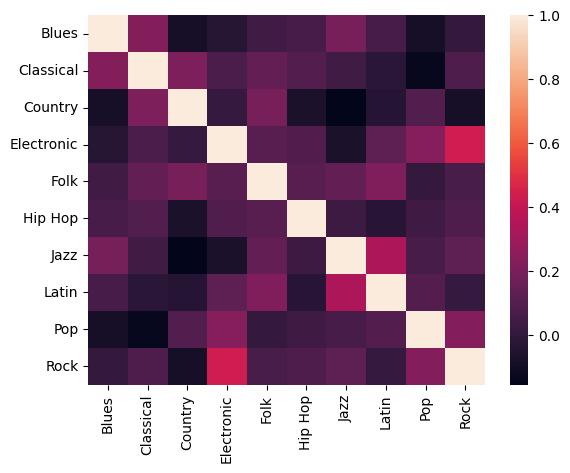

In [ ]:
sns.heatmap(music.corr(numeric_only=True))

c:\Users\Matt\Documents\umich\classes\SI618\si618fa23-student-main\.venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


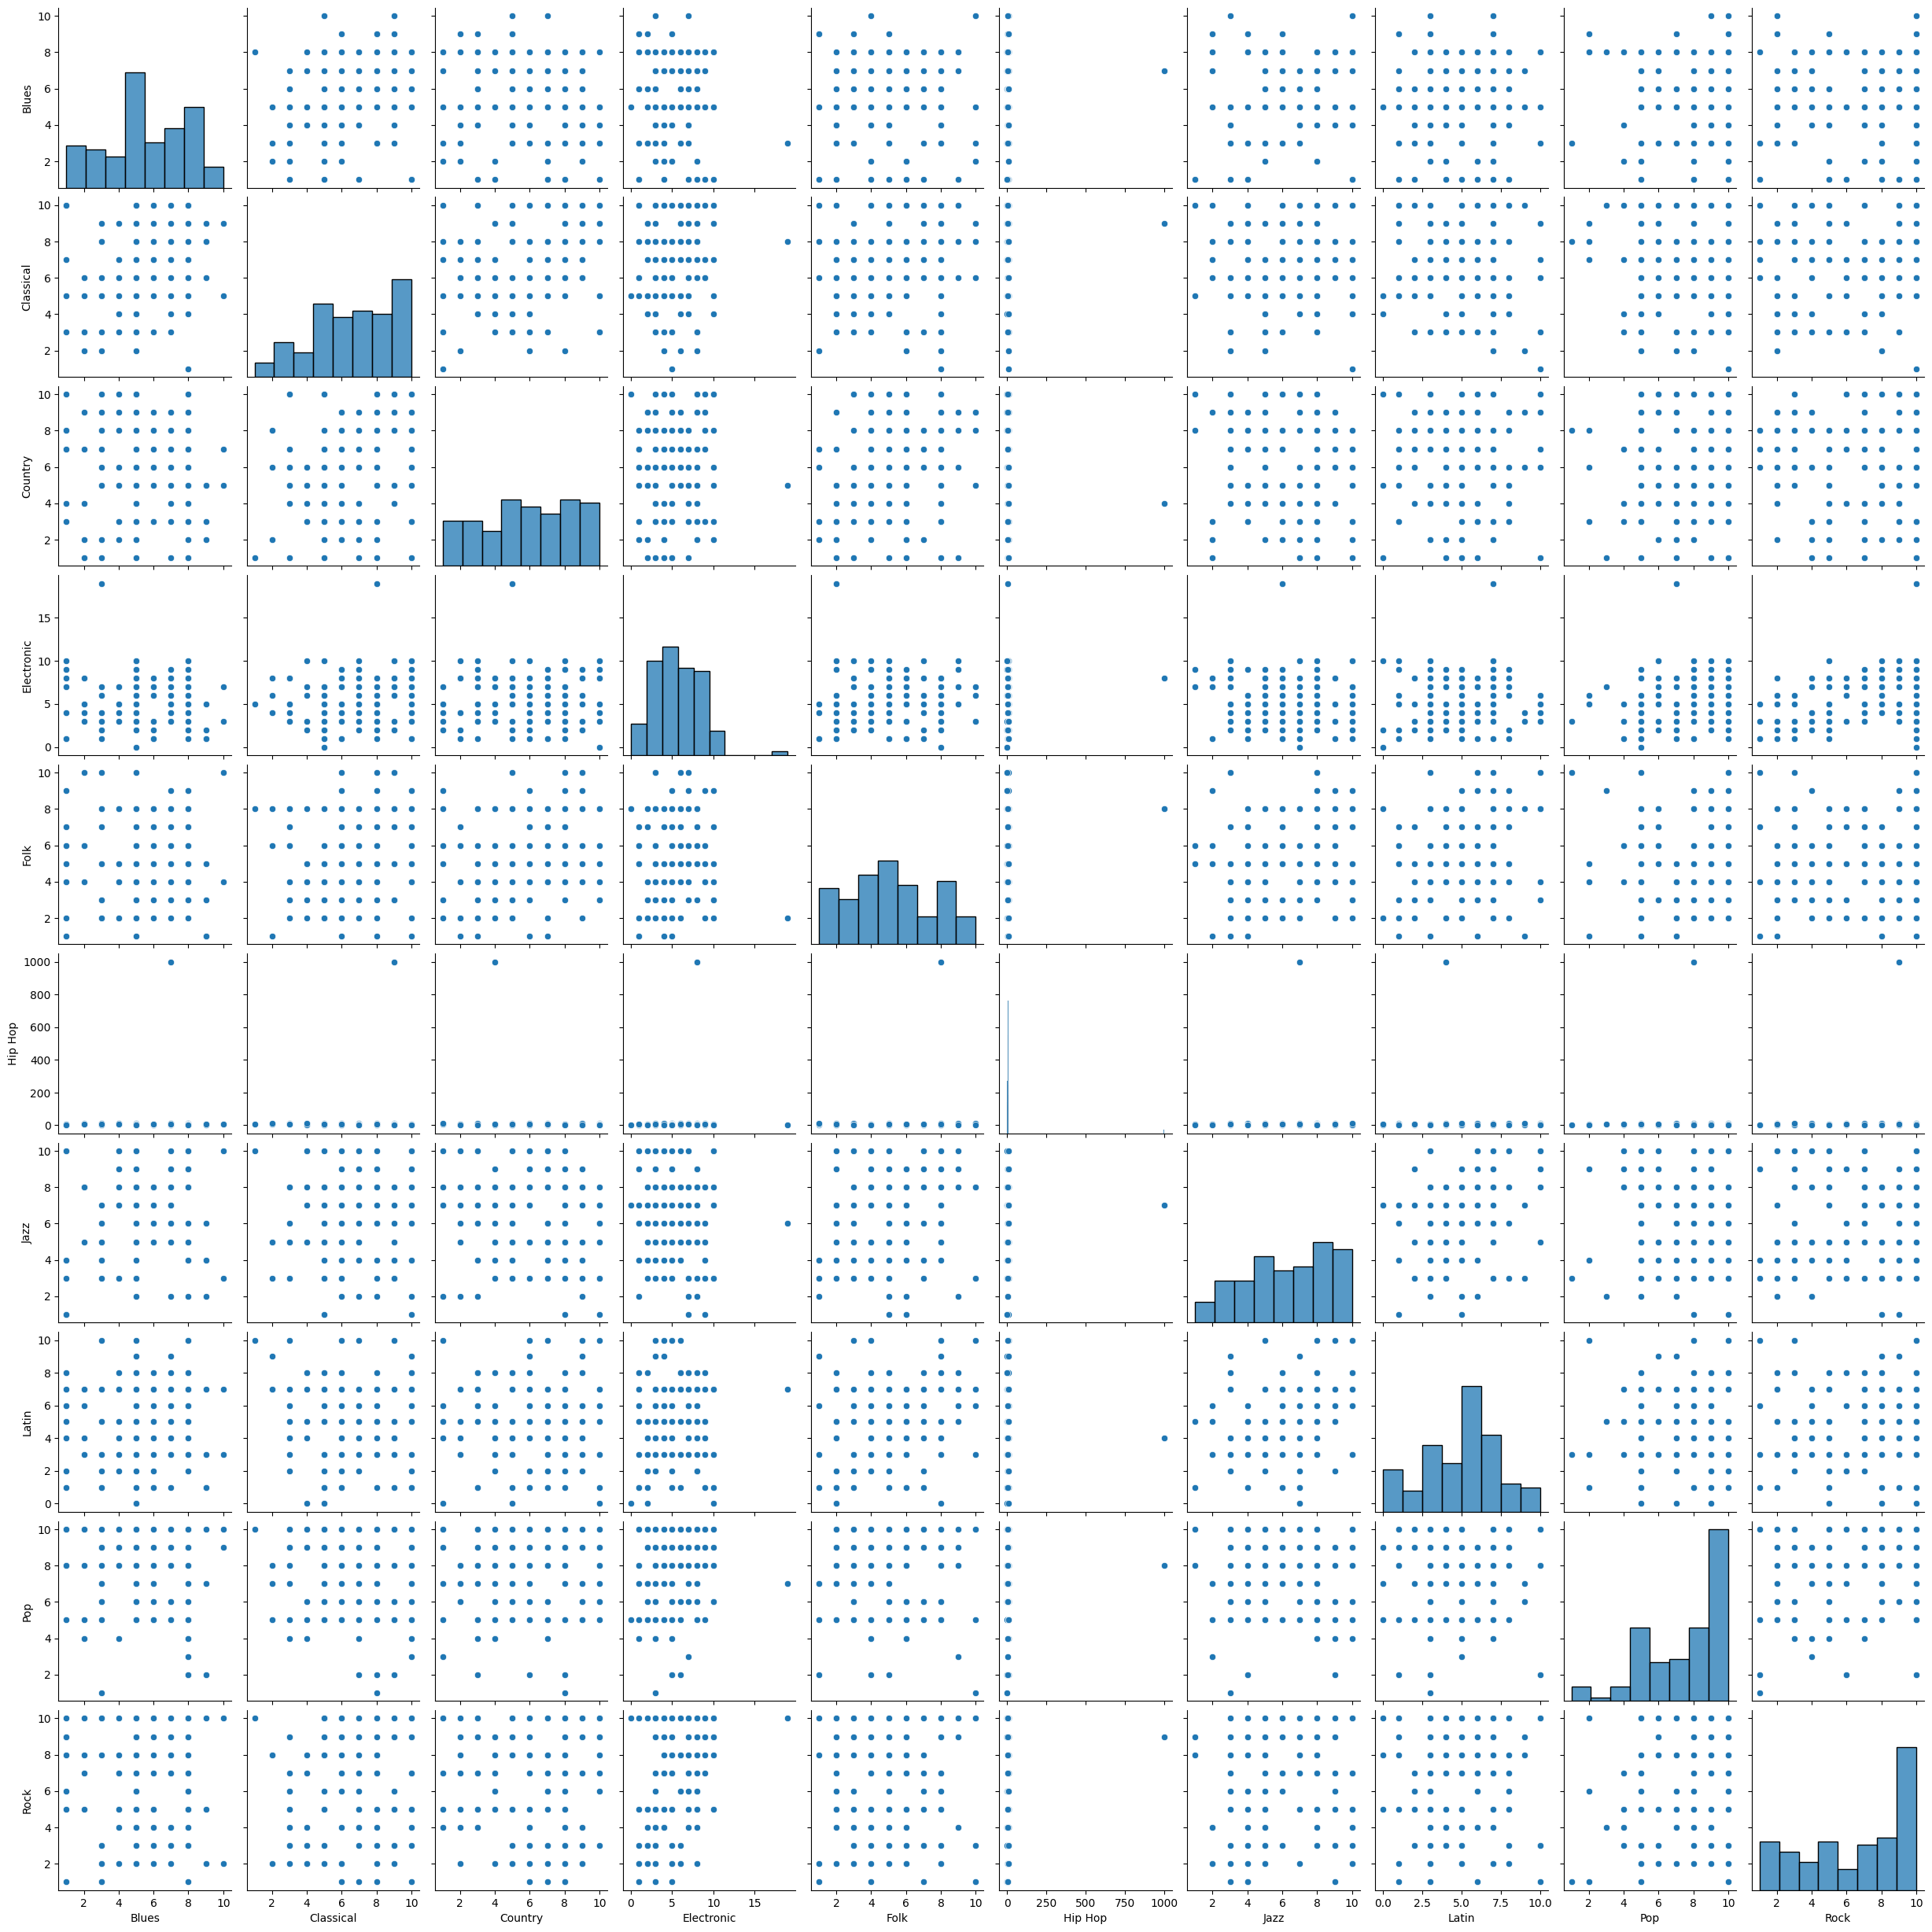

In [ ]:
sns.pairplot(music)

## Task
Create X (features matrix) and y (labels matrix) from the `music` dataframe:

In [54]:
X = music.drop("Name", axis=1)
y = music.Name

In [55]:
X2 = X.fillna(value=1)

## Task
Perform a multi-dimensional scaling on the music data.  Should you use metric or non-metric MDS?  Do the 
results differ between metric and non-metric?  Visualize your results.

In [56]:
npos = nmds.fit_transform(X2)

In [57]:
npos_labelled = pd.concat([pd.DataFrame({"who": y}), pd.DataFrame(npos)])
npos_labelled.columns = ["who", "mds1", "mds2"]
npos_labelled

,who,mds1,mds2
0,Alex T,NaN,NaN
1,Anne Chang,NaN,NaN
2,Arthur C.,NaN,NaN
3,Athena Fan,NaN,NaN
4,Bella,NaN,NaN
...,...,...,...
124,NaN,0.673113,0.540093
125,NaN,-0.298378,-0.165375
126,NaN,0.515158,-0.264912
127,NaN,-0.489788,0.097867


## Task
Perform a principal components analysis (PCA) on the music data.  Do you think you should scale the data before you
do the PCA?  How many principal components should you retain (hint: look at a scree plot and/or eigenvalues, a.k.a. the explained_variance_ attribute of the PCA model).  Visualize your results.

In [60]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X2)

In [61]:
pca.explained_variance_ratio_

array([0.99292184, 0.00168351, 0.00116533])

### Visualizing principal components

In [58]:
def pca_results(data, columns, pca):
    # Dimension indexing
    dimensions = [
        "Dimension {}".format(i) for i in range(1, len(pca.components_) + 1)
    ]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns=columns)
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(
        np.round(ratios, 4), columns=["Explained Variance"]
    )
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize=(14, 8))

    # Plot the feature weights as a function of the components
    components.plot(ax=ax, kind="bar")
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(
            i - 0.40,
            ax.get_ylim()[1] + 0.05,
            "Explained Variance\n %.4f" % (ev),
        )

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis=1)

In [73]:
music

,Name,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Rock
0,Alex T,8.0,6.0,9.0,9.0,9.0,10.0,8.0,8.0,9.0,10.0
1,Anne Chang,8.0,10.0,3.0,8.0,8.0,5.0,8.0,7.0,5.0,5.0
2,Arthur C.,5.0,9.0,4.0,8.0,8.0,5.0,5.0,5.0,5.0,5.0
3,Athena Fan,5.0,3.0,5.0,8.0,8.0,7.0,5.0,4.0,9.0,9.0
4,Bella,5.0,5.0,4.0,7.0,5.0,8.0,3.0,8.0,10.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...
125,Ruofei Li,9.0,8.0,5.0,1.0,5.0,8.0,6.0,7.0,9.0,5.0
126,Trace Grain,6.0,4.0,1.0,8.0,1.0,10.0,10.0,8.0,6.0,8.0
127,Namratha B,6.0,7.0,5.0,4.0,6.0,9.0,7.0,7.0,10.0,6.0
128,Erika A.,1.0,6.0,1.0,10.0,2.0,6.0,4.0,3.0,4.0,4.0


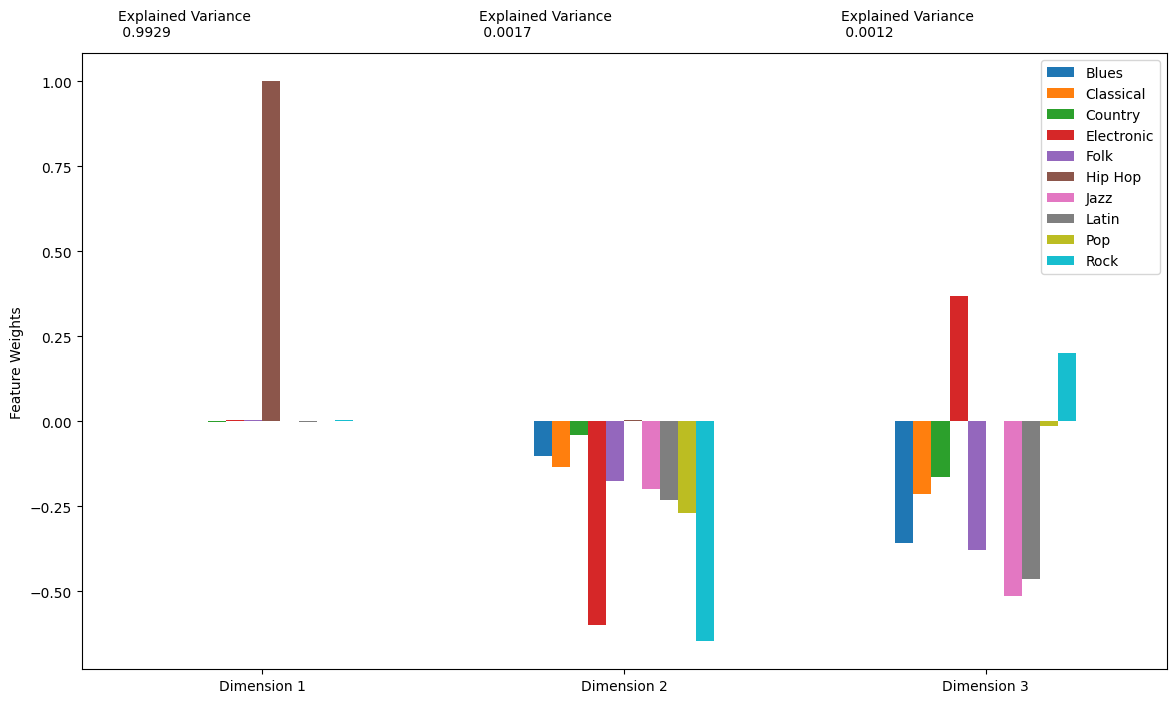

In [74]:
pcax = pca_results(X_pca, music.drop("Name", axis=1).columns, pca)

## Task
Perform a t-SNE analysis of the music data.  Experiment with different hyperparameters (i.e. perplexity and n_iter) to see how your solution changes.  Visualize your results.

In [ ]:
# Insert your code here

## Task
Compare the three analyses (MDS, PCA, and t-SNE).  Comment on similarities and differences.  What do you think the best technique is to use with the music data?

Insert your answer here.

## Stretch task

Use a Pipeline to perform a PCA on the music data.

## A few words about pipelines

Consider the following pipeline:

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = Pipeline(
    [
        ("scale", StandardScaler()),
        ("pca", PCA(n_components=5, random_state=42)),
    ]
)

In [76]:
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('pca', PCA(n_components=5, random_state=42))])

The pipeline can be queried by using `get_params()`:

In [77]:
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('pca', PCA(n_components=5, random_state=42))],
 'verbose': False,
 'scale': StandardScaler(),
 'pca': PCA(n_components=5, random_state=42),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 5,
 'pca__n_oversamples': 10,
 'pca__power_iteration_normalizer': 'auto',
 'pca__random_state': 42,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False}

The `named_steps` attribute holds (unsurprisingly) the named steps of the pipeline:

In [78]:
pipe.named_steps

{'scale': StandardScaler(), 'pca': PCA(n_components=5, random_state=42)}

The steps themselves can be accessed as attributes of the `named_steps` property:

In [79]:
pipe.named_steps.pca

PCA(n_components=5, random_state=42)

And specifics about the step can be modified by assigning new values to them:

In [80]:
pipe.named_steps.pca.n_components = 3

In [81]:
pipe.named_steps.pca

PCA(n_components=3, random_state=42)